<a href="https://colab.research.google.com/github/godud2604/AI-bootcamp/blob/main/imagePreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom
import pprint

In [3]:
def readDICOMfile(dicom_file_path):
    ds= dicom.dcmread(dicom_file_path)

    print(f"Modality..........: {ds.Modality}")
    print(f"Image size........: {ds.Rows} x {ds.Columns}")

    image = ds.pixel_array.copy()
    # 아래 전처리를 해주지 않는다면, 데이터를 구분해서 보기 어렵다. => 잡음 많이 발생
    # image[ image <= -1999] = 0 # ct영상은 촬영을 하면 보통 -1000 ~ -2000 또는  => 양수 or 음수로 나온다.
    image[ image <= -1000] = 0 # ct영상은 촬영을 하면 보통 -1000 ~ -2000 또는  => 양수 or 음수로 나온다.

    # 2D array로 표현되는 이미지
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)

    # imshow : vmin=0, vmax=255 있고 없음의 차이 알아보기
    plt.imshow(image, cmap=plt.cm.gray) # => 화면의 디스플레이 조정
    plt.title("Image")
    plt.grid(False)

    plt.subplot(1, 2, 2)
    plt.hist(ds.pixel_array  )
    plt.title("Histogram")
    plt.grid(True)
    plt.show()

    return ds


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
IMG_DIR = '/content/drive/MyDrive/biodata/img_data/'

In [6]:
img_list = ['00ac73cfc372.dcm' , 'MRI-Image-104.dcm' ,
            'ID_0000_AGE_0060_CONTRAST_1_CT.dcm',
            'ID_0052_AGE_0072_CONTRAST_0_CT.dcm',
            'dicom_00000001_000.dcm',
            'ID_0011fe81e.dcm', 'test.dcm'
           ]

Modality..........: CR
Image size........: 1024 x 1024


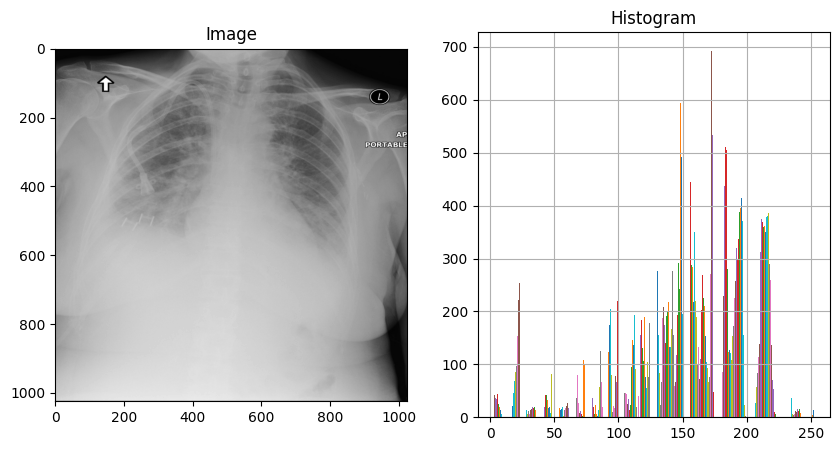

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.10001.1517875220.930580
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.10001.1517875220.930580
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [7]:
idx = 6
dicom_file_dataset= readDICOMfile(IMG_DIR + img_list[ idx ] )
pprint.pprint(dicom_file_dataset)


# 이미지 전처리

In [8]:
import cv2

영상1의 shape: (1024, 1024)
영상2의 shape: (512, 512, 3)


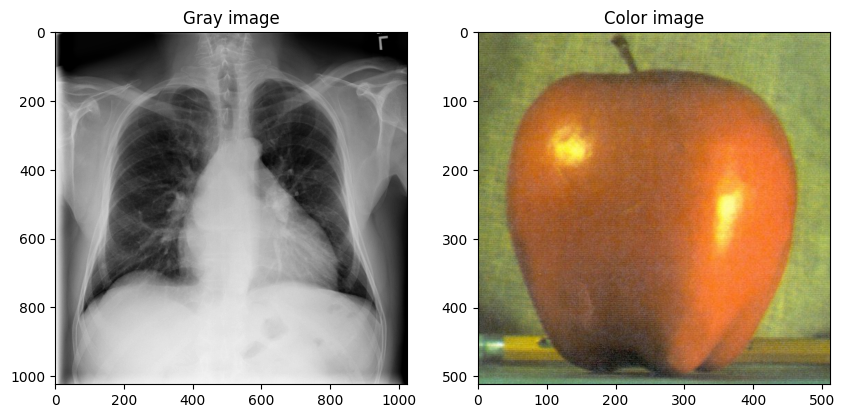

In [9]:
image1 = cv2.imread(IMG_DIR+'chest_01.png',cv2.IMREAD_GRAYSCALE)
print('영상1의 shape:', image1.shape)

image2 = cv2.imread(IMG_DIR+'apple.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB )
print('영상2의 shape:', image2.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Gray image")
plt.imshow(image1, cmap='gray' )

plt.subplot(1, 2, 2)
plt.title("Color image")
plt.imshow(image2)
plt.show()


(512, 512, 3) <class 'numpy.ndarray'>


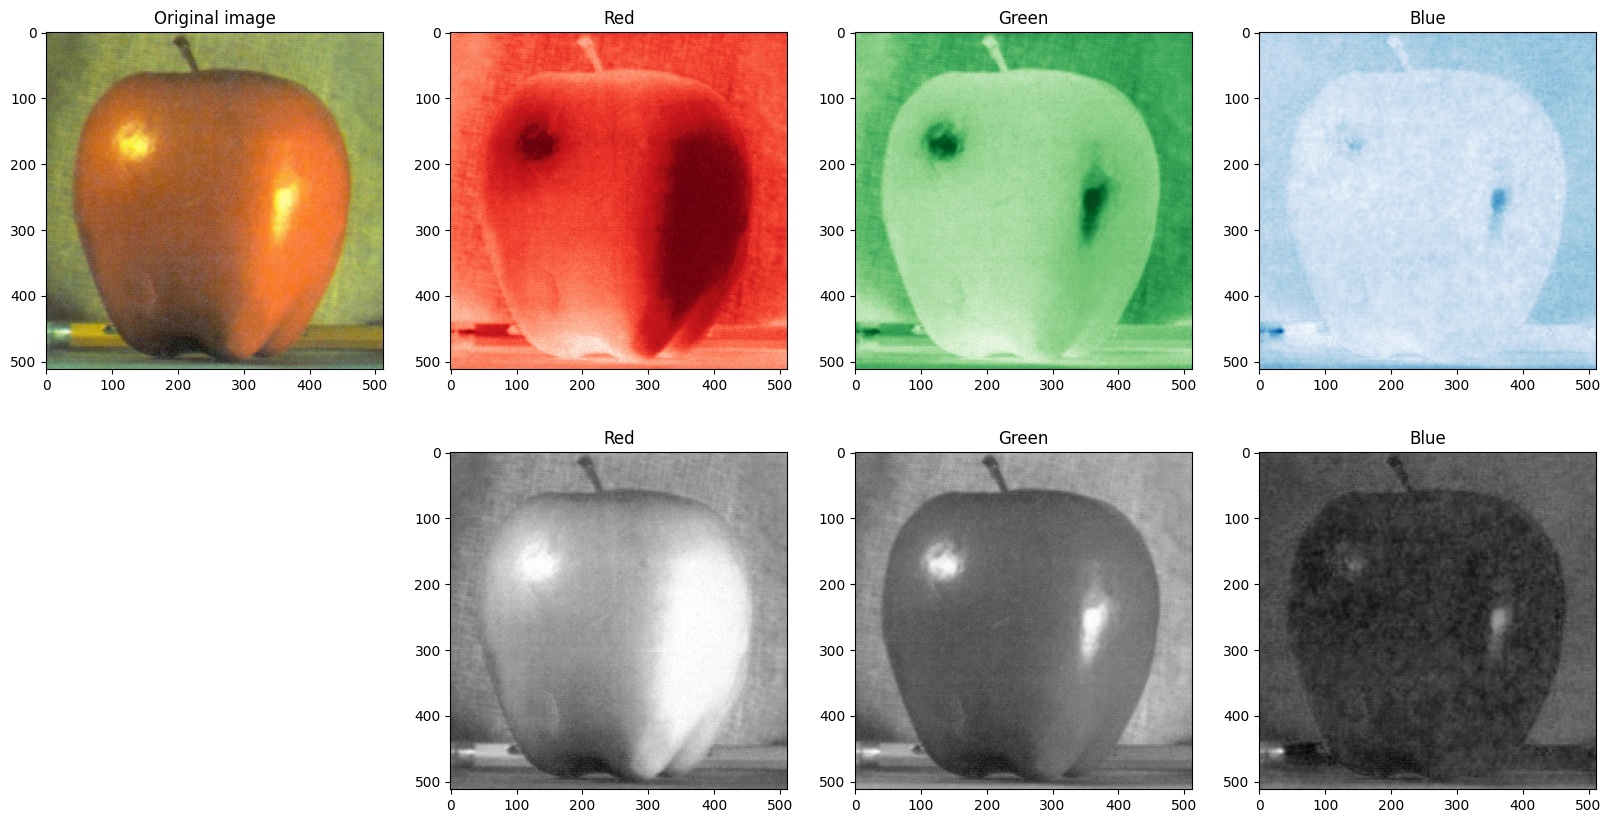

In [10]:
image2 = cv2.imread(IMG_DIR+'apple.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
print(image2.shape, type(image2))

plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.title("Original image")
plt.imshow(image2)
plt.subplot(2, 4, 2)
plt.title("Red")
plt.imshow(image2[ :, :, 0 ], cmap='Reds', vmin=0, vmax=255)
plt.subplot(2, 4, 3)
plt.title("Green")
plt.imshow(image2[ :, :, 1  ], cmap='Greens', vmin=0, vmax=255)
plt.subplot(2, 4, 4)
plt.title("Blue")
plt.imshow(image2[ :, :, 2  ], cmap='Blues', vmin=0, vmax=255)
plt.subplot(2, 4, 5).set_visible(False)
plt.subplot(2, 4, 6)
plt.title("Red")
plt.imshow(image2[ :, :, 0 ], cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 4, 7)
plt.title("Green")
plt.imshow(image2[ :, :, 1 ], cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 4, 8)
plt.title("Blue")
plt.imshow(image2[ :, :, 2 ], cmap='gray', vmin=0, vmax=255)
plt.show()


# 2.히스토그램
- https://docs.opencv.org/4.5.4/d8/dbc/tutorial_histogram_calculation.html


(1024, 1024)
영상 1의 shape: (1024, 1024)
결과 히스토그램의 길이와 타입: 256 <class 'numpy.ndarray'> (256, 1)
(1024, 1024)


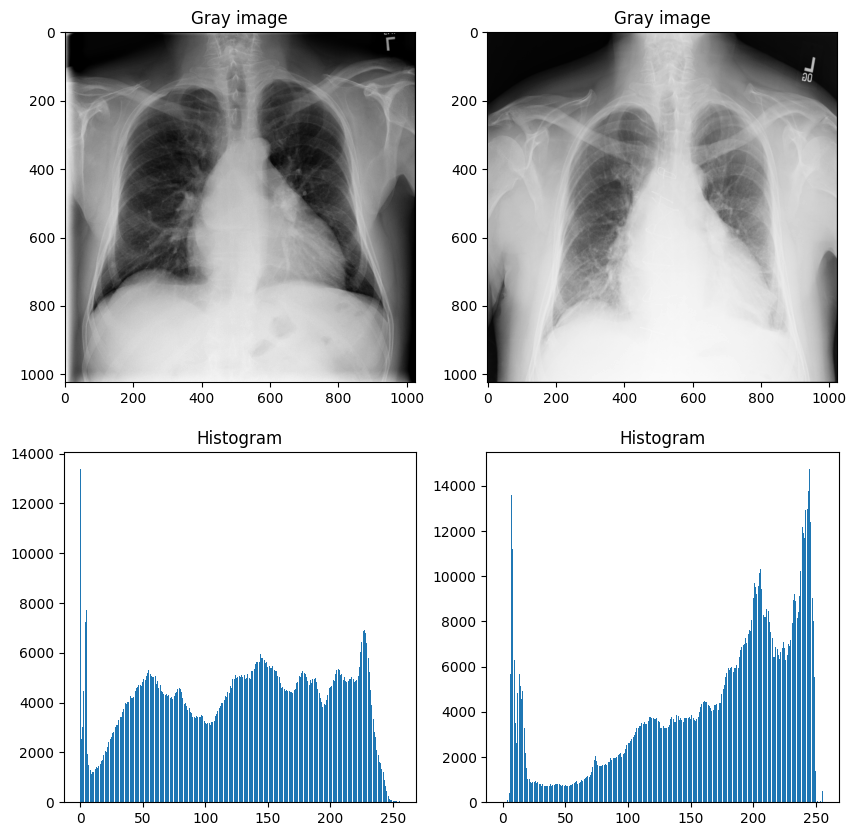

In [14]:
image1 = cv2.imread(IMG_DIR+'chest_01.png',cv2.IMREAD_GRAYSCALE)
print(image1.shape) # 2차원
image1_hist = cv2.calcHist([image1], [ 0 ], None, [ 256 ], [ 0, 256 ]) # 복습
print('영상 1의 shape:', image1.shape)
print('결과 히스토그램의 길이와 타입:', len(image1_hist), type(image1_hist), image1_hist.shape)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Gray image")
# 엑스레이 이미지는 항상 vmin=0, vmax=255 으로 출력
plt.imshow(image1, cmap='gray' , vmin=0, vmax=255  ) # 복습 => vmin, vmax 설정안해줬을 때 확인
plt.subplot(2, 2, 3)
plt.title("Histogram")
plt.bar(range(len(image1_hist)), image1_hist.flatten()  ) # 2차원 -> 1차원으로 변경


image2 = cv2.imread(IMG_DIR+'chest_02.png',cv2.IMREAD_GRAYSCALE)
print(image2.shape)
image2_hist = cv2.calcHist( [image2], [ 0 ], None, [ 256 ], [ 0, 256 ] )

plt.subplot(2, 2, 2)
plt.title("Gray image")
plt.imshow(image2, cmap='gray' )
plt.subplot(2, 2, 4)
plt.title("Histogram")
plt.bar(range(len(image2_hist)), image2_hist.flatten() )
plt.show()


## 영상의 밝기 조절
####  cv2.convertScaleAbs()
- https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga3460e9c9f37b563ab9dd550c4d8c4e7d


(1024, 1024)
조절할 밝기(-:어둡게, +:밝게): -30


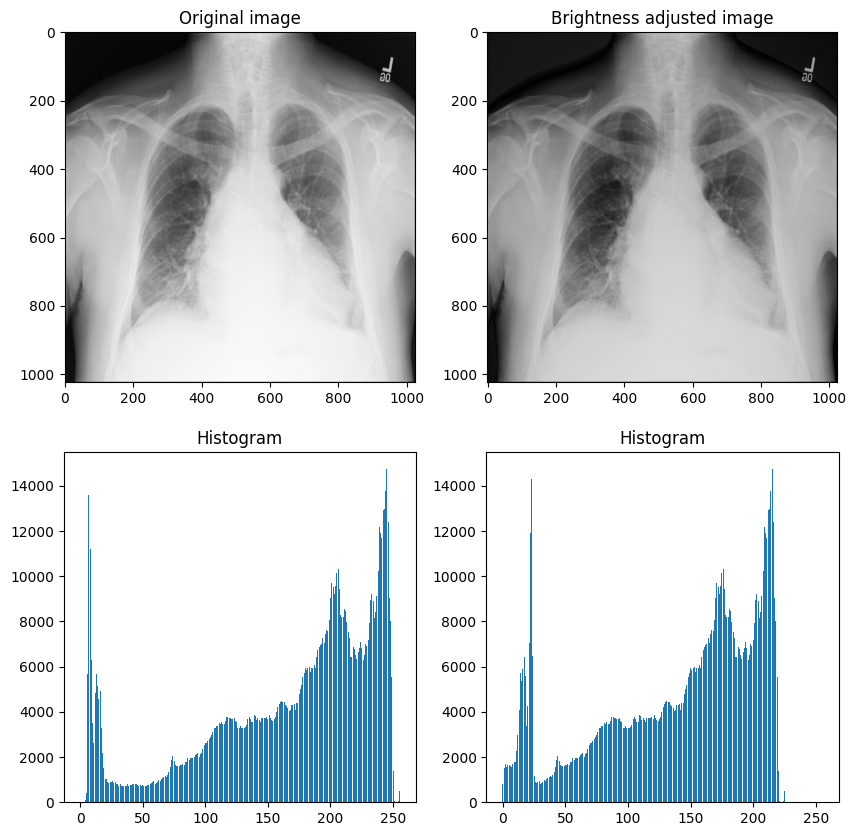

In [16]:
image2 = cv2.imread(IMG_DIR+'chest_02.png',cv2.IMREAD_GRAYSCALE)
print(image2.shape)
image2_hist = cv2.calcHist([image2], [0], None, [256], [0,256])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Original image")
plt.imshow(image2, cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 2, 3)
plt.title("Histogram")
plt.bar(range(len(image2_hist)), image2_hist.reshape(-1,)) # 1차원으로 변경

num = int(input('조절할 밝기(-:어둡게, +:밝게): '))

dst = cv2.convertScaleAbs(image2.astype('int32')   + num) # 복습 "int32"

dst_hist = cv2.calcHist([dst], [0], None, [256], [0,256])

plt.subplot(2, 2, 2)
plt.title("Brightness adjusted image")
plt.imshow(dst, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 4)
plt.title("Histogram")
plt.bar(range(len(dst_hist)), dst_hist.reshape(-1,))
plt.show()


# 3. Affine Transform

- https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983


## 3.1 Affine Transform: 회전


회전 각도: 5


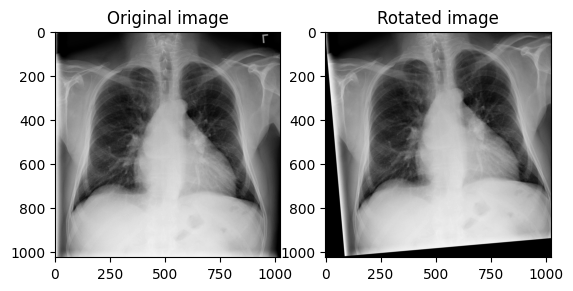

In [18]:
import math

src = cv2.imread(IMG_DIR+'chest_01.png',cv2.IMREAD_GRAYSCALE)

plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(src, cmap='gray')

theta = int(input('회전 각도: '))
rad = theta * math.pi / 180 # 각도 설정

# np.array로 Affine 행렬 생성
aff = np.array([[math.cos(rad), math.sin(rad), 0  ],
                [-math.sin(rad), math.cos(rad), 0  ]], dtype=np.float32)

dst = cv2.warpAffine(src, aff, (0, 0))
plt.subplot(1, 2, 2)
plt.title("Rotated image")
plt.imshow(dst, cmap='gray')
plt.show()


## 3.2 Affine Transform: 확대, 축소


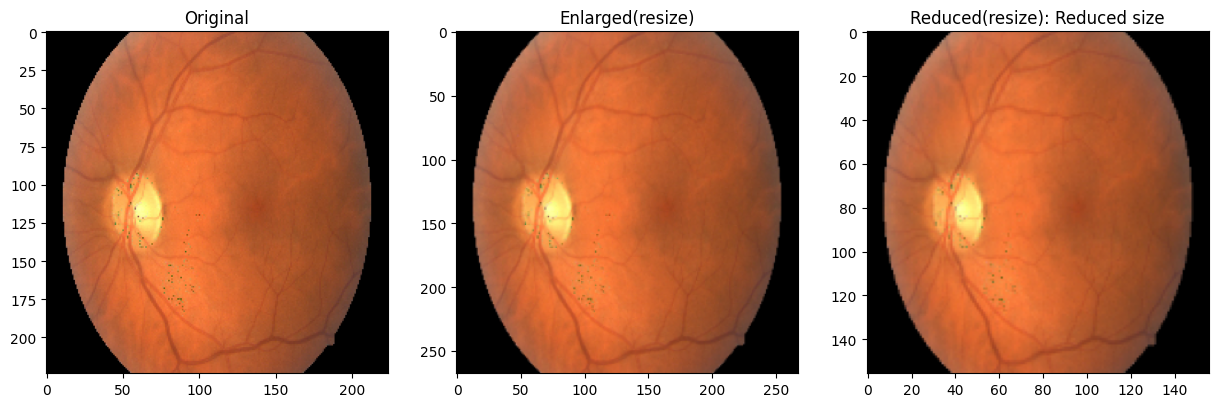

(224, 224, 3) (268, 268, 3) (156, 156, 3)


In [20]:
src = cv2.imread(IMG_DIR+'678_left.png')
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
height, width, channel = src.shape

alpha =  1.2    # 확대
beta =  0.7    # 축소
dst1 = cv2.resize (src, dsize=(int(width * alpha), int(height * alpha)))
dst2 = cv2.resize (src,dsize=(int(width * beta), int(height * beta)))


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(src)

plt.subplot(1, 3, 2)
plt.title("Enlarged(resize)")
plt.imshow(dst1)

plt.subplot(1, 3, 3)
plt.title("Reduced(resize): Reduced size")
plt.imshow(dst2)

plt.show()

# 확대 & 축소 후 =>육안상으로는 달라진게 없어보이나, size는 달라짐
print(src.shape, dst1.shape, dst2.shape)


# 5. Convolution
- https://en.wikipedia.org/wiki/Kernel_(image_processing)


## 5.1 Convolution: Blurring

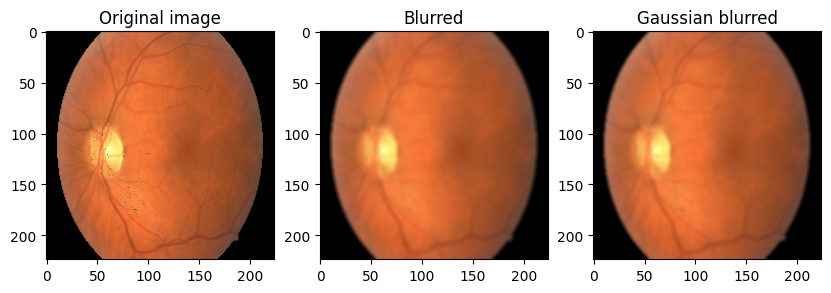

In [26]:

# image1 = cv2.imread(IMG_DIR+'pic2.png')
image1 = cv2.imread(IMG_DIR+'678_left.png')
src = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

ksize=5
dst1= cv2.blur(src, (ksize, ksize))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original image")
plt.imshow(src )

plt.subplot(1, 3, 2)
plt.title("Blurred")
plt.imshow(dst1)

ksize=5
dst2= cv2.GaussianBlur(src, (ksize, ksize), 2)
plt.subplot(1, 3, 3)
plt.title("Gaussian blurred")
plt.imshow(dst2)
plt.show()


## 5.2 Convolution: 에지(모서리) 추출
#### edge detector Laplacian
- https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6

#### edge detector Sobel
- https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d


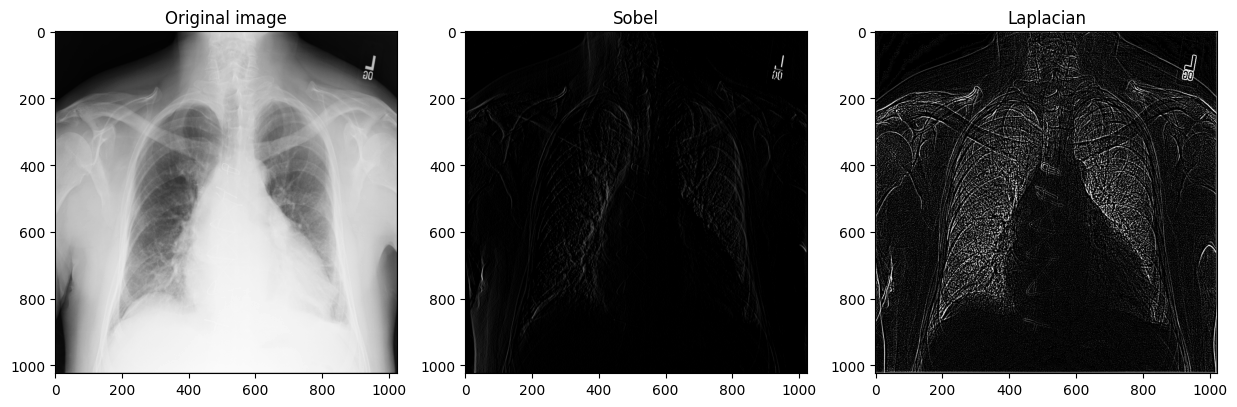

In [29]:
# gray = cv2.imread(IMG_DIR+'chest_01.png',cv2.IMREAD_GRAYSCALE)
gray = cv2.imread(IMG_DIR+'chest_02.png',cv2.IMREAD_GRAYSCALE)
# gray = cv2.imread(IMG_DIR+'678_right.png', cv2.IMREAD_GRAYSCALE)

kernel_size = 5
sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, kernel_size)
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=kernel_size)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original image")
plt.imshow(gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Sobel")
plt.imshow(sobel, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Laplacian")
plt.imshow(laplacian, cmap='gray')

plt.show()


# 6. 영상 마스킹


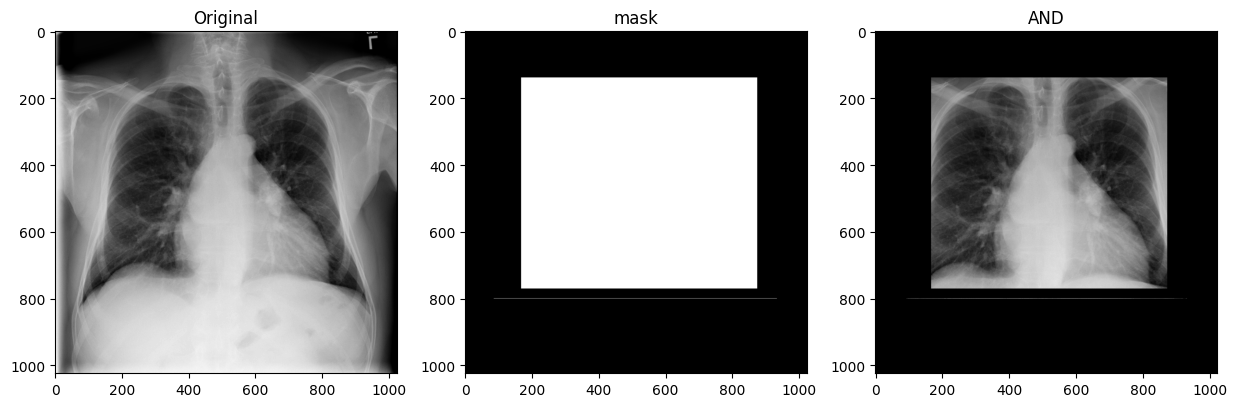

In [30]:
image1 = cv2.imread(IMG_DIR+'chest_01.png',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(IMG_DIR+'square_mask2.png',cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 2)
plt.title("mask")
plt.imshow(image2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.title("AND")
dst = image1 &  image2
plt.imshow(dst, cmap='gray', vmin=0, vmax=255)

plt.show()


# 7. Ben Graham's preprocessing method
#### APTOS 2019 Blindness Detection 경쟁부분 우승자 Ben Graham의 전처리 방법
- https://www.kaggle.com/competitions/aptos2019-blindness-detection
- https://www.kaggle.com/code/habibmrad1983/aptos-eye-preprocessing-in-diabetic-retinopathy


In [32]:
img = np.array([[0, 0, 0, 0, 0],
                [0, 9, 9, 9, 0],
                [0, 9, 9, 9, 0],
                [0, 9, 9, 9, 9],
                [0, 0, 0, 0, 0]])
mask = img > 7
print(mask)
print('-'*20)

grid = np.ix_(mask.any(  axis=1  ), mask.any( axis=0 ))
print(grid)
print('-'*20)
print(img[grid])


[[False False False False False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True  True]
 [False False False False False]]
--------------------
(array([[1],
       [2],
       [3]]), array([[1, 2, 3, 4]]))
--------------------
[[9 9 9 0]
 [9 9 9 0]
 [9 9 9 9]]


In [33]:
def crop_image(img, tol=7):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    mask = gray_img > tol
    grid = np.ix_(mask.any(  axis=1  ), mask.any( axis=0 ))

    check_shape = img[:,:,0][grid].shape[0]
    if (check_shape == 0): # image is too dark so that we crop out everything,
        return img # return original image
    else:
        img1=img[:,:,0][grid] # 쪼개서 작업
        img2=img[:,:,1][grid] # 쪼개서 작업
        img3=img[:,:,2][grid] # 쪼개서 작업
        img = np.stack([img1,img2,img3],axis=-1) # 1,2,3 스택으로 쌓임 => color 영상으로 변환 (# red, green, blue가 쌓임)

    return img


In [34]:
IMG_SIZE=224

def load_ben_color(path, tol=7, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image(image, tol) # 배경 하나도 없이 object
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    # 128으로 설정해줘야 아래의 histogram이 가운데에 정렬됨
    image=cv2.addWeighted ( image, 4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)

    return image


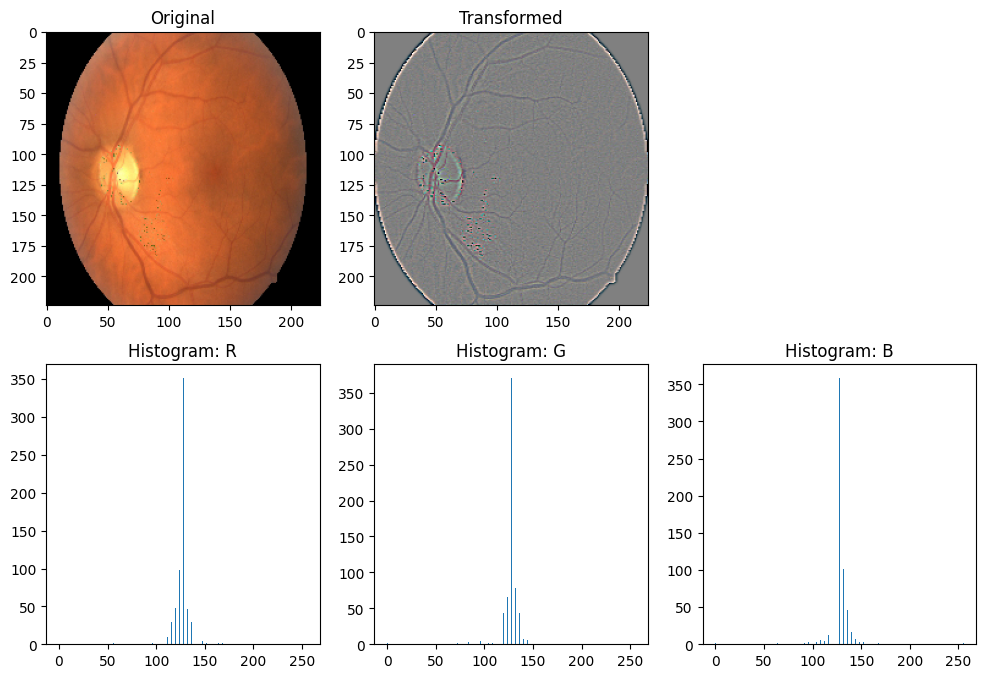

In [35]:
path= IMG_DIR+'678_left.png'
#path= IMG_DIR+'678_right.png'
src = cv2.imread(path)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

dst = load_ben_color(path,tol=7, sigmaX=1)  # sigmaX = 1, 1.5, 2, 5, 10


plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(src)

plt.subplot(2,3,2)
plt.title('Transformed')
plt.imshow(dst)

plt.subplot(2,3,4)
hist = cv2.calcHist(dst, [0], None, [256], [0,256])
plt.title('Histogram: R')
plt.bar(range(len(hist)), hist.flatten())

plt.subplot(2,3,5)
plt.title('Histogram: G')
hist = cv2.calcHist(dst, [1], None, [256], [0,256])
plt.bar(range(len(hist)), hist.flatten())

plt.subplot(2,3,6)
plt.title('Histogram: B')
hist = cv2.calcHist(dst, [2], None, [256], [0,256])
plt.bar(range(len(hist)), hist.flatten())
plt.show()


# 8. 템플릿 매칭


maxv :  0.8414313197135925
maxloc :  (727, 344)
template size:  (65, 32)


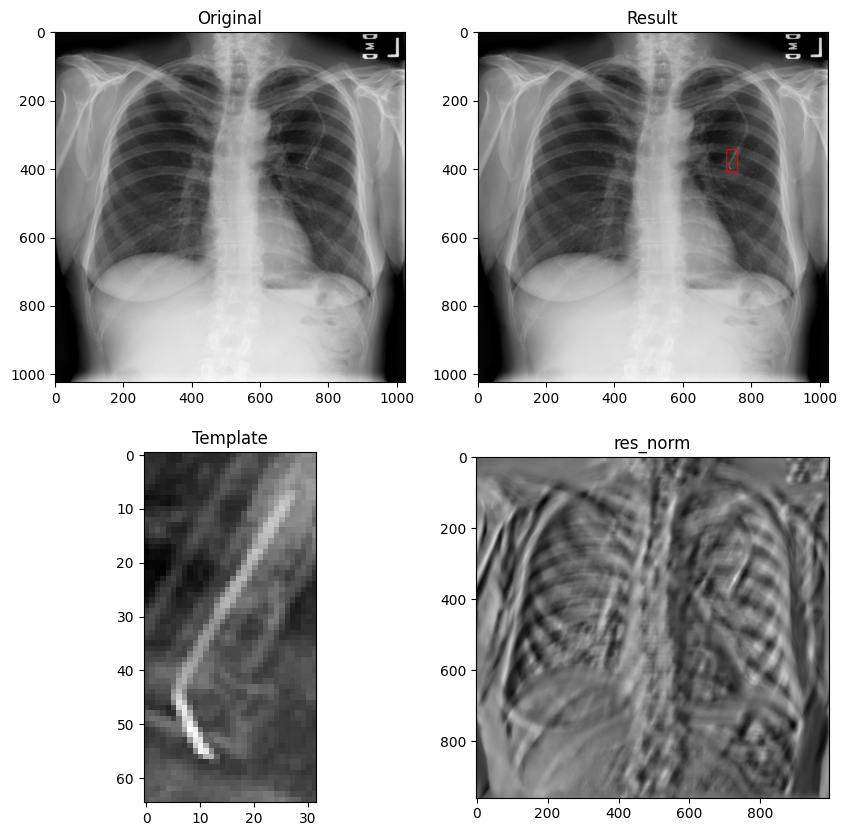

In [37]:
# 영상에서 템플릿 영상과 일치하는 곳 찾기
src = cv2.imread(IMG_DIR +'chest_05.png', cv2.IMREAD_GRAYSCALE)
templ = cv2.imread(IMG_DIR+'chest_template.png', cv2.IMREAD_GRAYSCALE)

# 탬플릿 매칭 & 결과 분석
res = cv2.matchTemplate(src, templ, cv2.TM_CCOEFF_NORMED ) # 여기서 최댓값 찾기

# 최솟값 0, 최댓값 255 지정하여 결과값을 그레이스케일 영상으로 만들기
res_norm = cv2.normalize(res, None, 0 , 255 , cv2.NORM_MINMAX, cv2.CV_8U)

# 최댓값을 찾아야하므로 minmaxloc 사용, min, max, min좌표, max좌표 반환
_, maxv, _, maxloc = cv2.minMaxLoc(res)

print('maxv : ', maxv)
print('maxloc : ', maxloc)
print('template size: ', templ.shape)

# 매칭 결과를 빨간색 사각형으로 표시
th, tw = templ.shape[:2]
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
cv2.rectangle(dst, maxloc, (maxloc[0] + tw, maxloc[1] + th), (255, 0, 0), 2)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(src, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Result")
plt.imshow(dst)

plt.subplot(2, 2, 3)
plt.title("Template")
plt.imshow(templ, cmap='gray')

plt.subplot(2, 2, 4)
plt.title("res_norm")
plt.imshow(res_norm, cmap='gray')
plt.show()
